<a href="https://colab.research.google.com/github/pavel195/machine_learning/blob/main/LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

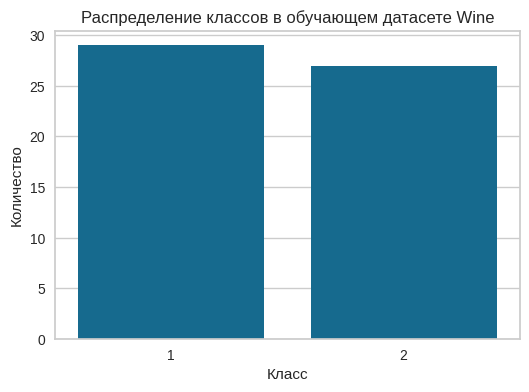

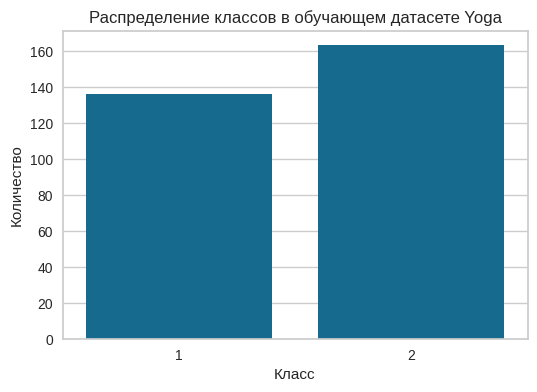

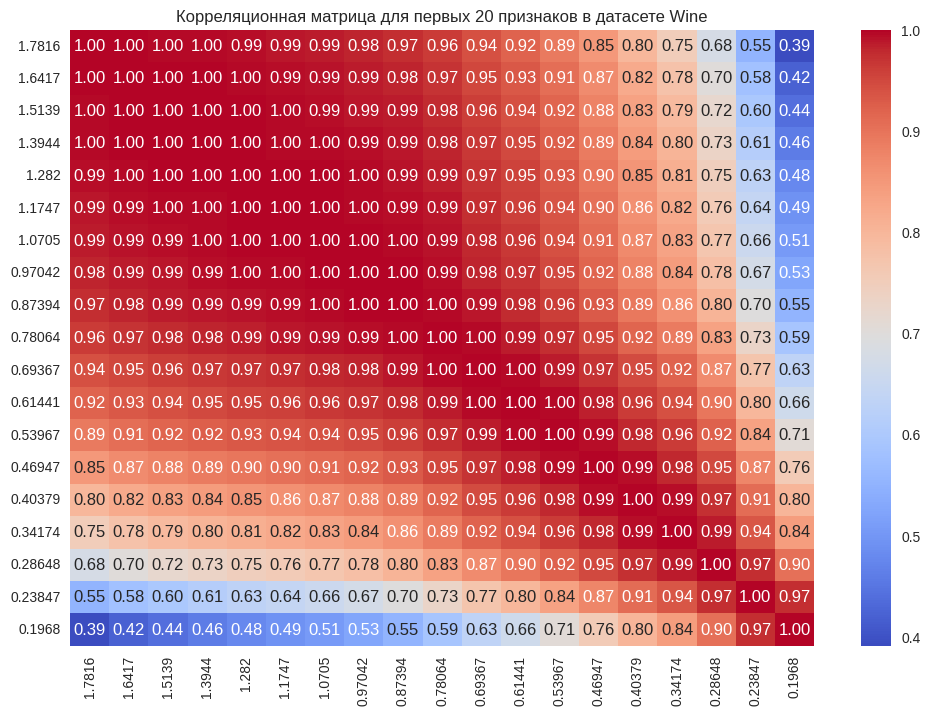

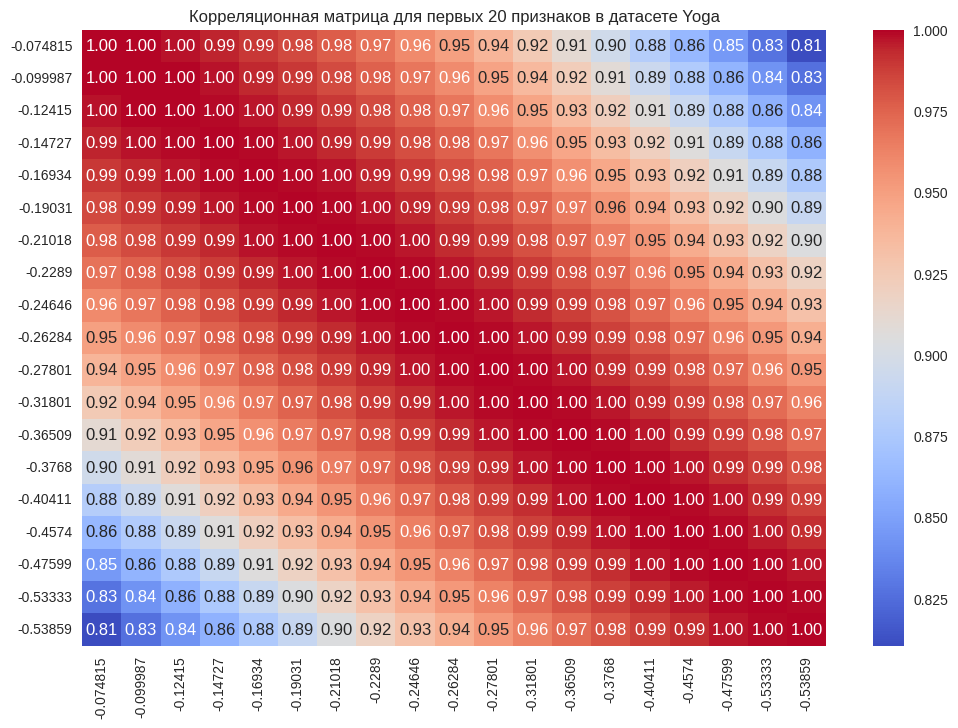

('Средняя точность на датасете Wine: 71.36%',
 'Средняя точность на датасете Yoga: 80.94%')

In [11]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Загрузка и просмотр данных
wine_train = pd.read_csv('Wine_TRAIN')
wine_test = pd.read_csv('Wine_TEST')
yoga_train = pd.read_csv('yoga_TRAIN')
yoga_test = pd.read_csv('yoga_TEST')

# Анализ распределения классов в датасете Wine
plt.figure(figsize=(6,4))
sns.countplot(x=wine_train.iloc[:, 0])
plt.title("Распределение классов в обучающем датасете Wine")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

# Анализ распределения классов в датасете Yoga
plt.figure(figsize=(6,4))
sns.countplot(x=yoga_train.iloc[:, 0])
plt.title("Распределение классов в обучающем датасете Yoga")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

# Корреляционная матрица для первых 20 признаков датасета Wine
plt.figure(figsize=(12,8))
corr_matrix_wine = wine_train.iloc[:, 1:20].corr()
sns.heatmap(corr_matrix_wine, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица для первых 20 признаков в датасете Wine")
plt.show()

# Корреляционная матрица для первых 20 признаков датасета Yoga
plt.figure(figsize=(12,8))
corr_matrix_yoga = yoga_train.iloc[:, 1:20].corr()
sns.heatmap(corr_matrix_yoga, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица для первых 20 признаков в датасете Yoga")
plt.show()

# Подготовка данных для модели классификации Wine
X_wine_train = wine_train.iloc[:, 1:]  # Признаки
y_wine_train = wine_train.iloc[:, 0]   # Метки классов

# Стандартизация признаков
scaler_wine = StandardScaler()
X_wine_train_scaled = scaler_wine.fit_transform(X_wine_train)

# Инициализация модели случайного леса для классификации
rf_wine = RandomForestClassifier(random_state=42)

# Кросс-валидация для модели на датасете Wine
cv_scores_wine = cross_val_score(rf_wine, X_wine_train_scaled, y_wine_train, cv=5)

# Подготовка данных для модели классификации Yoga
X_yoga_train = yoga_train.iloc[:, 1:]  # Признаки
y_yoga_train = yoga_train.iloc[:, 0]   # Метки классов

# Стандартизация признаков
scaler_yoga = StandardScaler()
X_yoga_train_scaled = scaler_yoga.fit_transform(X_yoga_train)

# Инициализация модели случайного леса для классификации
rf_yoga = RandomForestClassifier(random_state=42)

# Кросс-валидация для модели на датасете Yoga
cv_scores_yoga = cross_val_score(rf_yoga, X_yoga_train_scaled, y_yoga_train, cv=5)

# Вывод результатов кросс-валидации
wine_accuracy = f"Средняя точность на датасете Wine: {cv_scores_wine.mean() * 100:.2f}%"
yoga_accuracy = f"Средняя точность на датасете Yoga: {cv_scores_yoga.mean() * 100:.2f}%"

wine_accuracy, yoga_accuracy


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Определяем модели для тестирования
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC()
}

# Определяем сетку гиперпараметров для каждой модели
param_grids = {
    "LogisticRegression": {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    "RandomForest": {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    "SVC": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Стандартный цикл для обучения моделей и сравнения
results = {}

for model_name, model in models.items():
    print(f"Тестирование модели: {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_wine_train_scaled, y_wine_train)

    # Сохраняем лучшие результаты для каждой модели
    results[model_name] = {
        "Лучшие параметры": grid_search.best_params_,
        "Точность": grid_search.best_score_
    }

# Вывод результатов
for model_name, result in results.items():
    print(f"Модель: {model_name}")
    print(f"Лучшие параметры: {result['Лучшие параметры']}")
    print(f"Точность: {result['Точность']:.4f}\n")


Тестирование модели: LogisticRegression
Тестирование модели: RandomForest
Тестирование модели: SVC
Модель: LogisticRegression
Лучшие параметры: {'C': 1, 'solver': 'liblinear'}
Точность: 0.7894

Модель: RandomForest
Лучшие параметры: {'max_depth': 20, 'n_estimators': 50}
Точность: 0.7136

Модель: SVC
Лучшие параметры: {'C': 1, 'kernel': 'linear'}
Точность: 0.7894



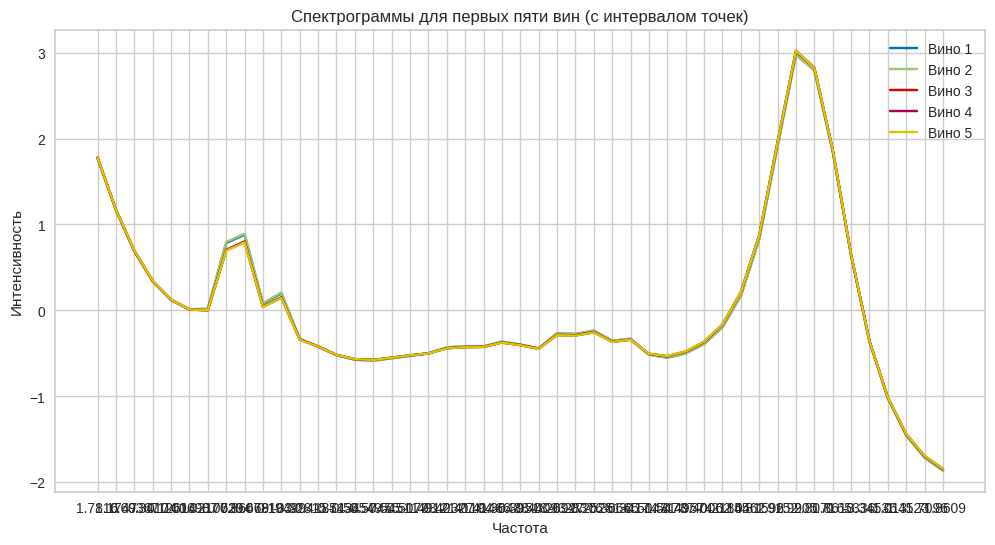

In [16]:

plt.figure(figsize=(12, 6))

# Установим интервал между точками, чтобы улучшить визуализацию
N = 5  # Интервал для выборки точек
for i in range(5):
    wine_spectrum = wine_train.iloc[i, 1:]  # Спектры вин
    plt.plot(wine_spectrum[::N], label=f'Вино {i+1}')  # Строим с интервалом в N точек

# Оформление графика
plt.title('Спектрограммы для первых пяти вин (с интервалом точек)')
plt.xlabel('Частота')
plt.ylabel('Интенсивность')
plt.legend()
plt.grid(True)

# Показать график
plt.show()
